In [1]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import pandas as pd
from neuralprophet import NeuralProphet

In [3]:
from prophet import Prophet
import pandas as pd

In [4]:
from prophet import Prophet
import pandas as pd
s=pd.read_csv(r"C:\Users\prernagupta\Desktop\corr\mediumpink.csv")


In [6]:
s

,ds,y,nsi,newness_index,markdown_index,oos_index,avg_price_trend_innovator,avg_price_trend_mass,avg_price_trend_conservative,avg_price_base_innovator,...,innovator_adoption,mass_adoption,conservative_adoption,innovator_smoothed_data,mass_smoothed_data,conservative_smoothed_data,trend,trend_index,trend_name,model_created_at
0,19/03/2017,0.000586,0.000688,-0.077209,0.825818,0.0,0.0,20.847143,27.990,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,Orchid Flower Apparel Global,1100,orchid_flower_apparel_all_w,May-22
1,26/03/2017,0.000463,0.000707,-0.049746,0.817822,0.0,0.0,12.990000,15.995,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,Orchid Flower Apparel Global,1100,orchid_flower_apparel_all_w,May-22
2,02/04/2017,0.000640,0.000709,-0.018442,0.810274,0.0,1595.0,22.485000,15.995,228.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,Orchid Flower Apparel Global,1100,orchid_flower_apparel_all_w,May-22
3,09/04/2017,0.000638,0.000700,0.016705,0.803173,0.0,1595.0,22.235000,24.990,239.285714,...,NaN,NaN,NaN,NaN,NaN,NaN,Orchid Flower Apparel Global,1100,orchid_flower_apparel_all_w,May-22
4,16/04/2017,0.000619,0.000685,0.055693,0.796519,0.0,1595.0,23.199286,24.990,239.500000,...,0.133289,0.189499,0.11194,0.103788,0.12909,0.137749,Orchid Flower Apparel Global,1100,orchid_flower_apparel_all_w,May-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,02/04/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Orchid Flower Apparel Global,1100,orchid_flower_apparel_all_w,May-22
316,09/04/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Orchid Flower Apparel Global,1100,orchid_flower_apparel_all_w,May-22
317,16/04/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Orchid Flower Apparel Global,1100,orchid_flower_apparel_all_w,May-22
318,23/04/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Orchid Flower Apparel Global,1100,orchid_flower_apparel_all_w,May-22


In [7]:
s=s.iloc[:, [0,1]]
s
s['ds']= pd.to_datetime(s['ds'])
s
s=s.dropna()

WARNING - (py.warnings._showwarnmsg) - <ipython-input-7-3b3973789abb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['ds']= pd.to_datetime(s['ds'])



In [8]:
s.tail(50)

,ds,y
218,2021-05-23,0.001201
219,2021-05-30,0.001128
220,2021-06-06,0.001210
221,2021-06-13,0.001208
222,2021-06-20,0.001186
223,2021-06-27,0.001194
224,2021-04-07,0.001221
225,2021-11-07,0.001198
226,2021-07-18,0.001149
227,2021-07-25,0.001175


In [11]:
m = NeuralProphet(growth="discontinuous",  # Determine trend types: 'linear', 'discontinuous', 'off'
        changepoints=None, # list of dates that may include change points (None -> automatic )
        n_changepoints=5,
        changepoints_range=1,
        trend_reg=0,
        trend_reg_threshold=False,
        yearly_seasonality=True,
        weekly_seasonality=False,
        daily_seasonality=False,
        seasonality_mode="additive",
        seasonality_reg=0,
        n_forecasts=1,
        n_lags=0,
        num_hidden_layers=1,
        d_hidden=None,     # Dimension of hidden layers of AR-Net
        ar_sparsity=None,  # Sparcity in the AR coefficients
        learning_rate=10,
        loss_func="Huber",
        normalize="auto",  # Type of normalization ('minmax', 'standardize', 'soft', 'off')
        impute_missing=True, epochs=2000)
metrics = m.fit(s, freq="7D")
future = m.make_future_dataframe(s, periods=75, n_historic_predictions=len(s))
forecast = m.predict(future)

INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
Epoch[2000/2000]: 100%|█| 2000/2000 [01:16<00:00, 26.26it/s, SmoothL1Loss=0.0133, MAE=0.000223, RMSE=0.000302, RegLoss=


Text(0.5, 1.0, 'orchid')

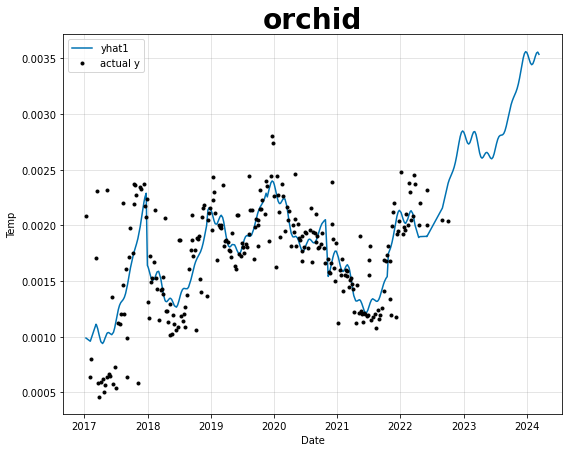

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
m.plot(forecast, xlabel="Date", ylabel="Temp", ax=ax)
ax.set_title("orchid", fontsize=28, fontweight="bold")

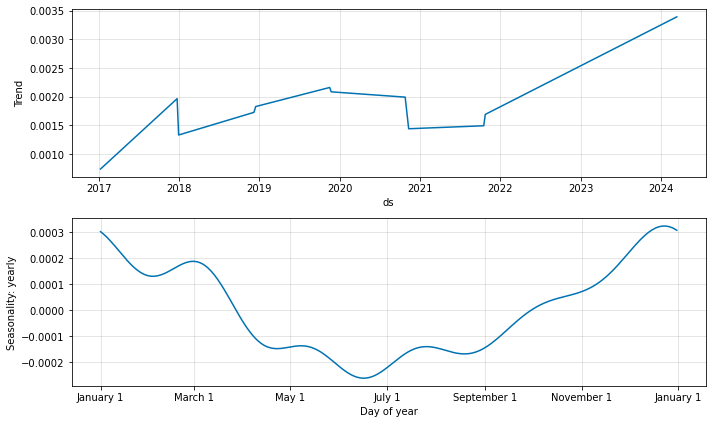

In [13]:
fig_comp = m.plot_components(forecast)

In [14]:
metrics

,SmoothL1Loss,MAE,RMSE,RegLoss
0,0.229277,0.001035,0.001252,0.0
1,0.122960,0.000732,0.000925,0.0
2,0.063554,0.000554,0.000673,0.0
3,0.041377,0.000435,0.000537,0.0
4,0.038147,0.000414,0.000517,0.0
...,...,...,...,...
1995,0.013323,0.000223,0.000303,0.0
1996,0.013324,0.000223,0.000302,0.0
1997,0.013320,0.000223,0.000296,0.0
1998,0.013318,0.000223,0.000301,0.0
